# **Latihan Soal SATRIA DATA NSC 2015**

**SOAL :**
1. Gambaran keadaan underpricing pada perusahaan
2. Faktor-faktor yang paling memengaruhi tingkat underpricing 
3. Analisis apakah faktor-faktor tersebut sesuai dengan hasil penelitian
4. Rekomendasi analisis terbaik, termasuk jenis analisis, asumsi yang digunakan, 
dan penjelasan.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [43]:
df = pd.read_excel('NSC_Data.xlsx')
df.head(10).style.background_gradient(cmap="Greens")

,Kode,Tingkat Underpricing,ROE,LEV,PER,Suku Bunga,Tingkat Inflasi
0,BISI,0.700000,0.113700,0.503300,39.950000,0.087500,0.060100
1,WEHA,0.693900,0.010400,0.543400,48.430000,0.087500,0.060100
2,BKDP,0.700000,0.000200,0.965800,470.900000,0.085000,0.057700
3,SGRO,0.078100,0.183200,0.331100,30.320000,0.085000,0.057700
4,MNCN,0.044400,0.081200,0.658000,26.210000,0.085000,0.057700
5,MCOR,0.125000,0.002100,0.856700,126.380000,0.082500,0.060600
6,PKPK,0.700000,0.100000,0.473300,20.990000,0.082500,0.060600
7,LCGP,0.696000,0.008700,0.412900,47.540000,0.082500,0.060600
8,DEWA,0.686600,0.011200,0.829700,133.600000,0.082500,0.069500
9,BACA,0.366700,0.011700,0.789200,13.100000,0.082500,0.068800


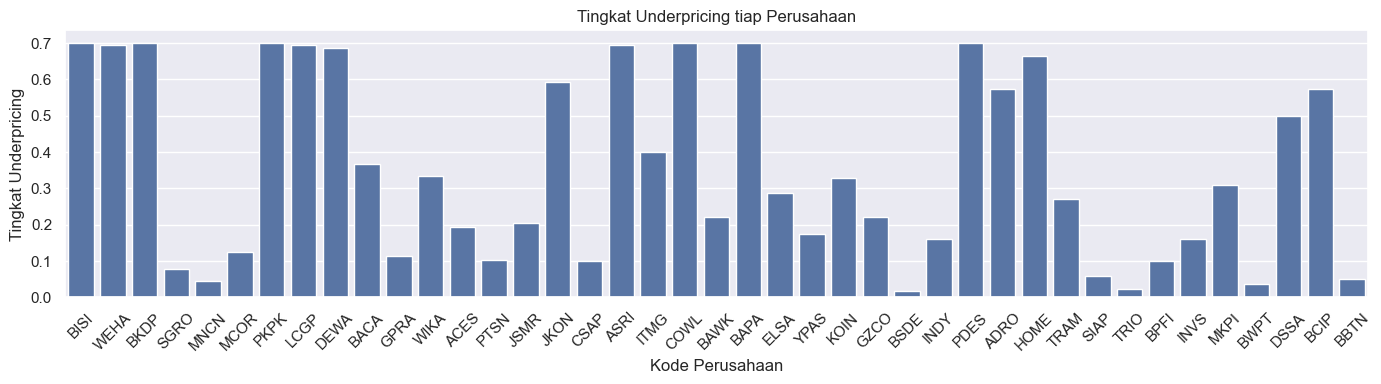

In [4]:
plt.figure(figsize=(14, 4))
sns.barplot(x='Kode', y='Tingkat Underpricing', data=df)
plt.title('Tingkat Underpricing tiap Perusahaan')
plt.xlabel('Kode Perusahaan')
plt.ylabel('Tingkat Underpricing')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

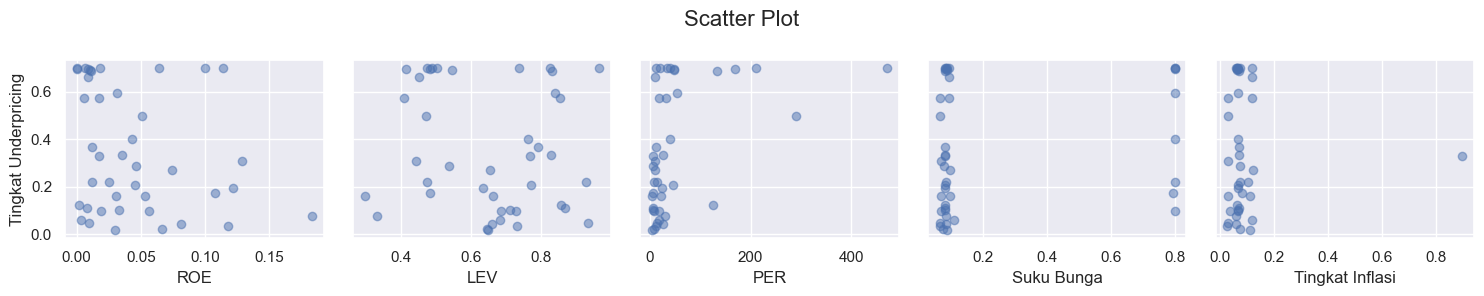

In [15]:
# Variabel untuk sumbu x
x_vars = ['ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']
n_vars = len(x_vars)

# Membuat grid plot dengan 1 baris dan beberapa kolom
fig, axes = plt.subplots(1, n_vars, figsize=(15, 3), sharey=True)

# Variabel y adalah Tingkat Underpricing
y_var = 'Tingkat Underpricing'

# Membuat scatter plot untuk setiap variabel x
for i, x_var in enumerate(x_vars):
    axes[i].scatter(df[x_var], df[y_var], alpha=0.5)
    axes[i].set_xlabel(x_var)

# Set label y hanya pada plot pertama
axes[0].set_ylabel(y_var)

# Mengatur layout agar rapi
plt.suptitle('Scatter Plot', fontsize=16)
plt.tight_layout()

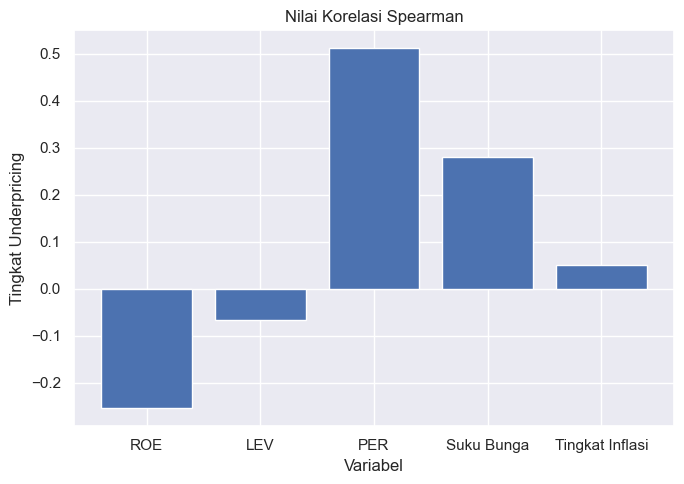

In [14]:
# Hitung matriks korelasi
corr_matrix = df[['Tingkat Underpricing', 'ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']].corr(method='spearman')

# Ambil korelasi dengan Tingkat Underpricing
corr_with_underpricing = corr_matrix['Tingkat Underpricing'].drop('Tingkat Underpricing')

# Membuat bar plot
fig, ax = plt.subplots(figsize=(7, 5))
variables = ['ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']
ax.bar(variables, corr_with_underpricing)
ax.set_xlabel('Variabel')
ax.set_ylabel('Tingkat Underpricing')
ax.set_title('Nilai Korelasi Spearman')
ax.tick_params(axis='x')
plt.tight_layout()

# **Clustering**

Mengelompokkan kode perusahaan terhadap tingkat underpricing untuk menentukan karakteristik perusahaan

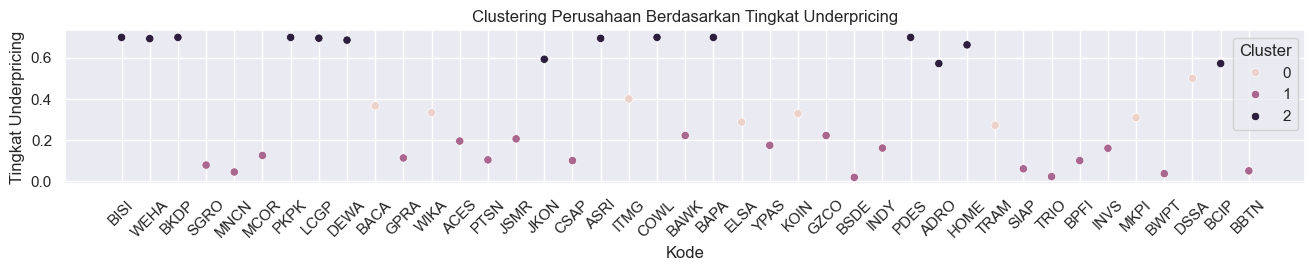

In [45]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Tingkat Underpricing']])
plt.figure(figsize=(16, 2))
sns.scatterplot(x='Kode', y='Tingkat Underpricing', hue='Cluster', data=df)
plt.xticks(rotation=45) 
plt.title('Clustering Perusahaan Berdasarkan Tingkat Underpricing')
plt.show()

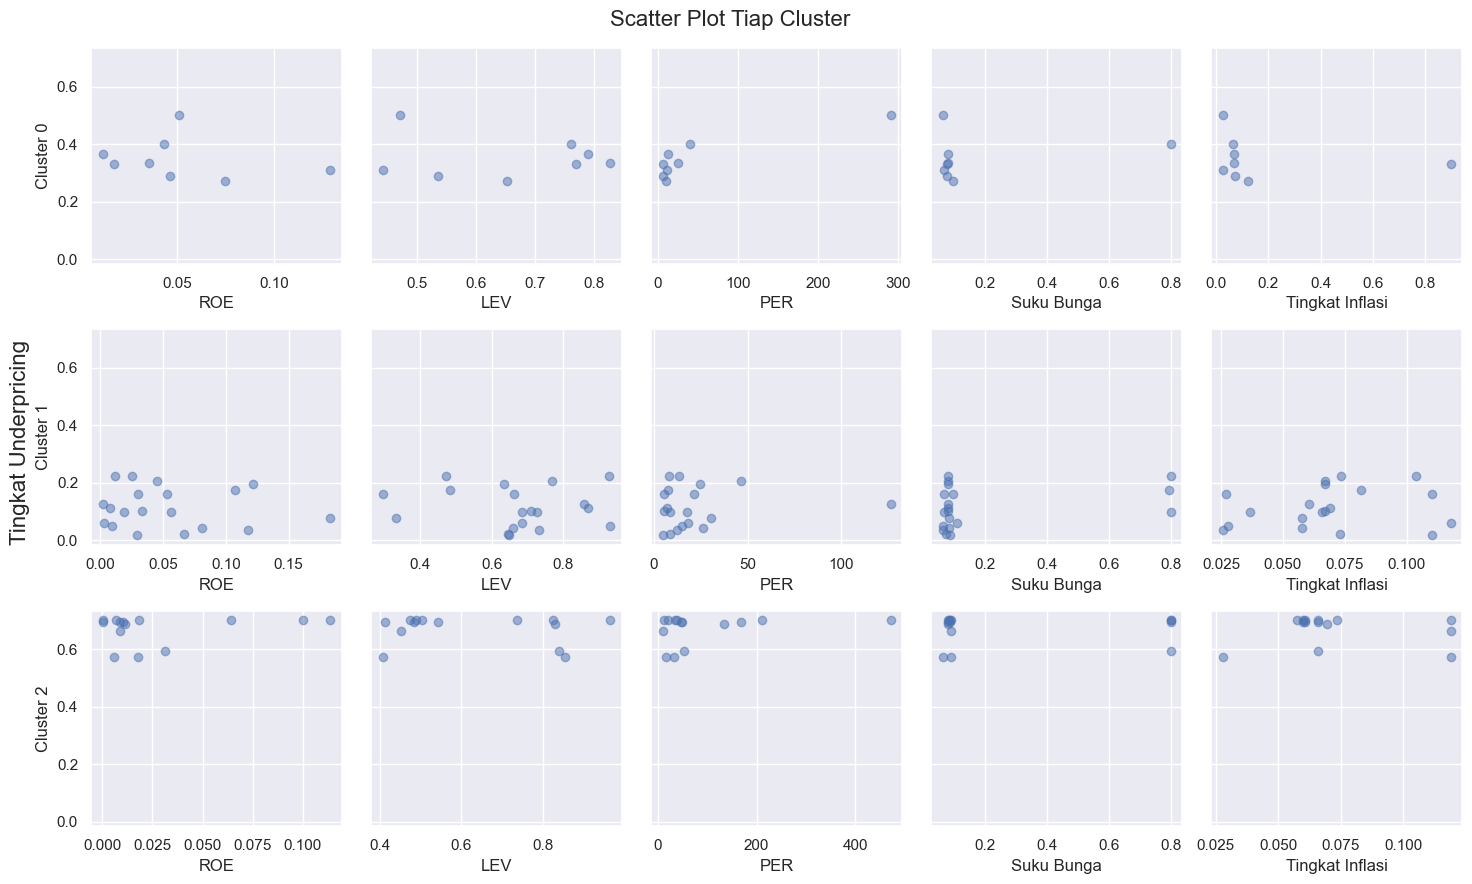

In [60]:
# Variabel untuk sumbu x
x_vars = ['ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']
n_vars = len(x_vars)

# Membuat grid plot dengan 3 baris (1 per cluster) dan 5 kolom
fig, axes = plt.subplots(3, n_vars, figsize=(15, 9), sharey=True)

# Variabel y adalah Tingkat Underpricing
y_var = 'Tingkat Underpricing'

# Loop untuk setiap cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    for i, x_var in enumerate(x_vars):
        axes[cluster, i].scatter(cluster_data[x_var], cluster_data[y_var], alpha=0.5)
        axes[cluster, i].set_xlabel(x_var)
        axes[cluster, i].grid(True)
    # Set judul untuk setiap baris cluster
    axes[cluster, 0].set_ylabel(f'Cluster {cluster}')

# Menyesuaikan layout agar rapi
fig.supylabel('Tingkat Underpricing', fontsize=16)
plt.suptitle('Scatter Plot Tiap Cluster', fontsize=16)
plt.tight_layout()

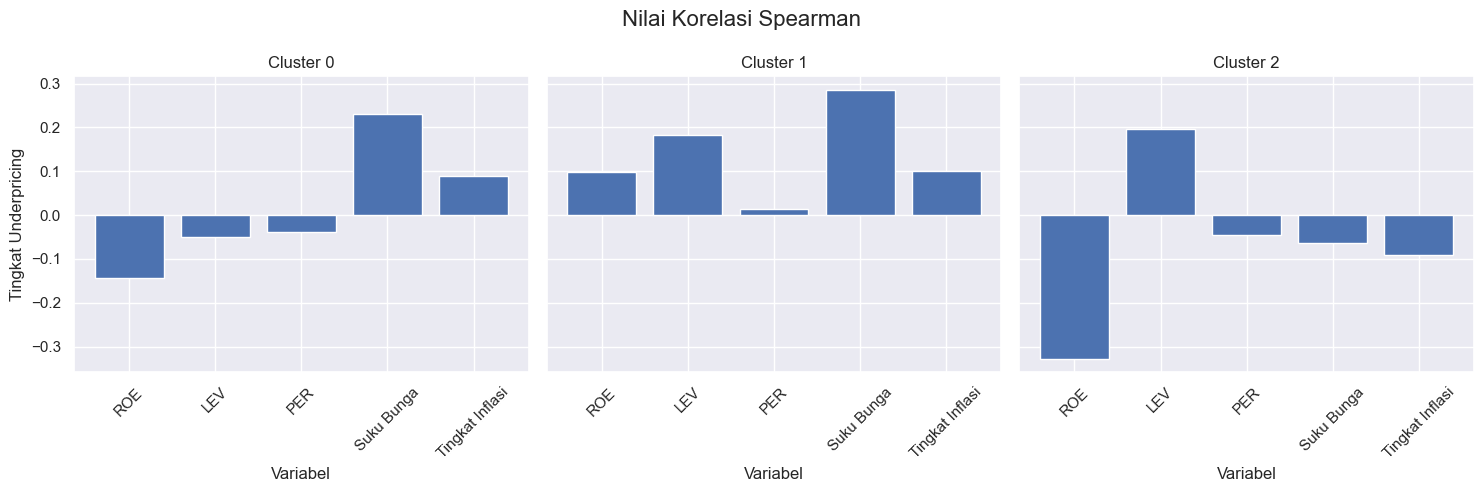

In [13]:
# Hitung korelasi Spearman untuk setiap cluster
clusters = [0, 1, 2]
correlations = {}

for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster]
    corr_matrix = cluster_data[['Tingkat Underpricing', 'ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']].corr(method='spearman')
    correlations[cluster] = corr_matrix['Tingkat Underpricing'].drop('Tingkat Underpricing')

# Membuat bar plot dalam satu frame dengan 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

variables = ['ROE', 'LEV', 'PER', 'Suku Bunga', 'Tingkat Inflasi']

for i, cluster in enumerate(clusters):
    axes[i].bar(variables, correlations[cluster])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Variabel')
    axes[i].tick_params(axis='x', rotation=45)
    if i == 0:
        axes[i].set_ylabel('Tingkat Underpricing')

# Menyesuaikan layout
plt.suptitle('Nilai Korelasi Spearman', fontsize=16)
plt.tight_layout()

# **Model**

**Keseluruhan**

In [10]:
x_k = df.drop(columns=['Kode', 'Cluster', 'Tingkat Underpricing'])
y_k = df['Tingkat Underpricing']

model = DecisionTreeRegressor(max_depth=2)
model.fit(x_k, y_k)

DecisionTreeRegressor(max_depth=2)

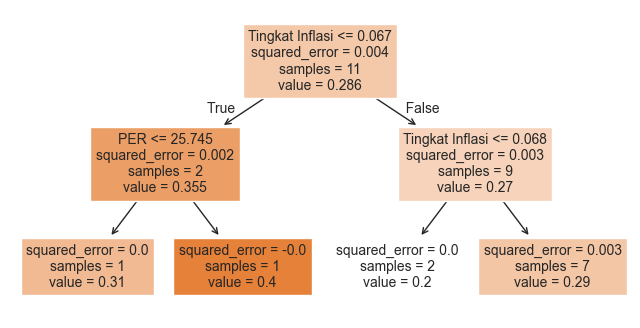

In [22]:
plt.subplots(figsize=(8,4))
plot_tree(model, fontsize=10, feature_names=X.columns, filled=True)
plt.show()

**Clustering**

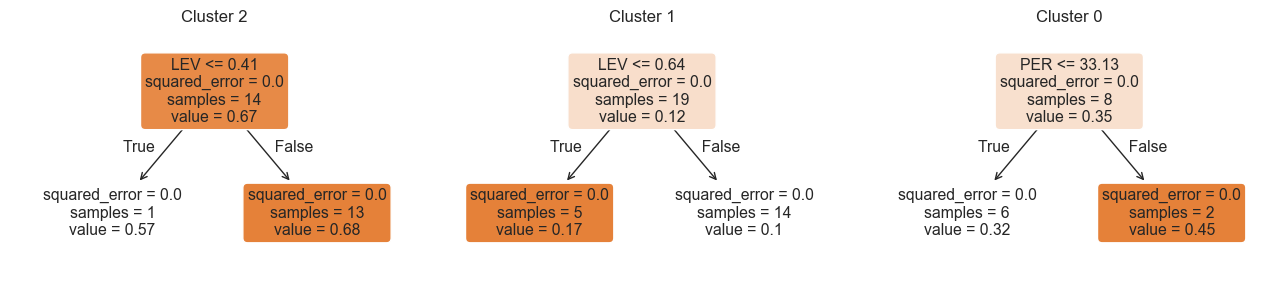

In [67]:
# Pisahkan data berdasarkan cluster
clusters = df['Cluster'].unique()
n_clusters = len(clusters)

# Buat subplot dalam satu frame
fig, axes = plt.subplots(1, n_clusters, figsize=(13, 3), squeeze=False)

for idx, cluster in enumerate(clusters):
    cluster_data = df[df['Cluster'] == cluster].drop(columns=['Cluster', 'Kode'])
    
    # Fitur (X) dan target (y)
    X = cluster_data.drop(columns=['Tingkat Underpricing'])
    y = cluster_data['Tingkat Underpricing']
    
    # Membuat dan melatih model Decision Tree
    model = DecisionTreeRegressor(max_depth=1)
    model.fit(X, y)
    
    # Visualisasi pohon keputusan
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True, precision=2, ax=axes[0, idx])
    axes[0, idx].set_title(f'Cluster {cluster}')

# Penyesuaian layout
plt.tight_layout()
plt.show()